In [2]:

import numpy as np
import pandas as pd
import collections
from tqdm import tqdm
import random
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
from IPython.display import Image as Img
import tensorflow as tf
from sklearn.metrics import fbeta_score



In [3]:
df = pd.read_csv("./train_v2.csv")
df.head(10)

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


In [4]:
df['image_name'] = './train-jpg/' + df['image_name'] + '.jpg'

df['tags_split'] = df['tags'].apply(lambda x: x.split(' '))
labels_list = sum(list(df['tags_split'].values), [])
labels = set(labels_list)
labels

{'agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water'}

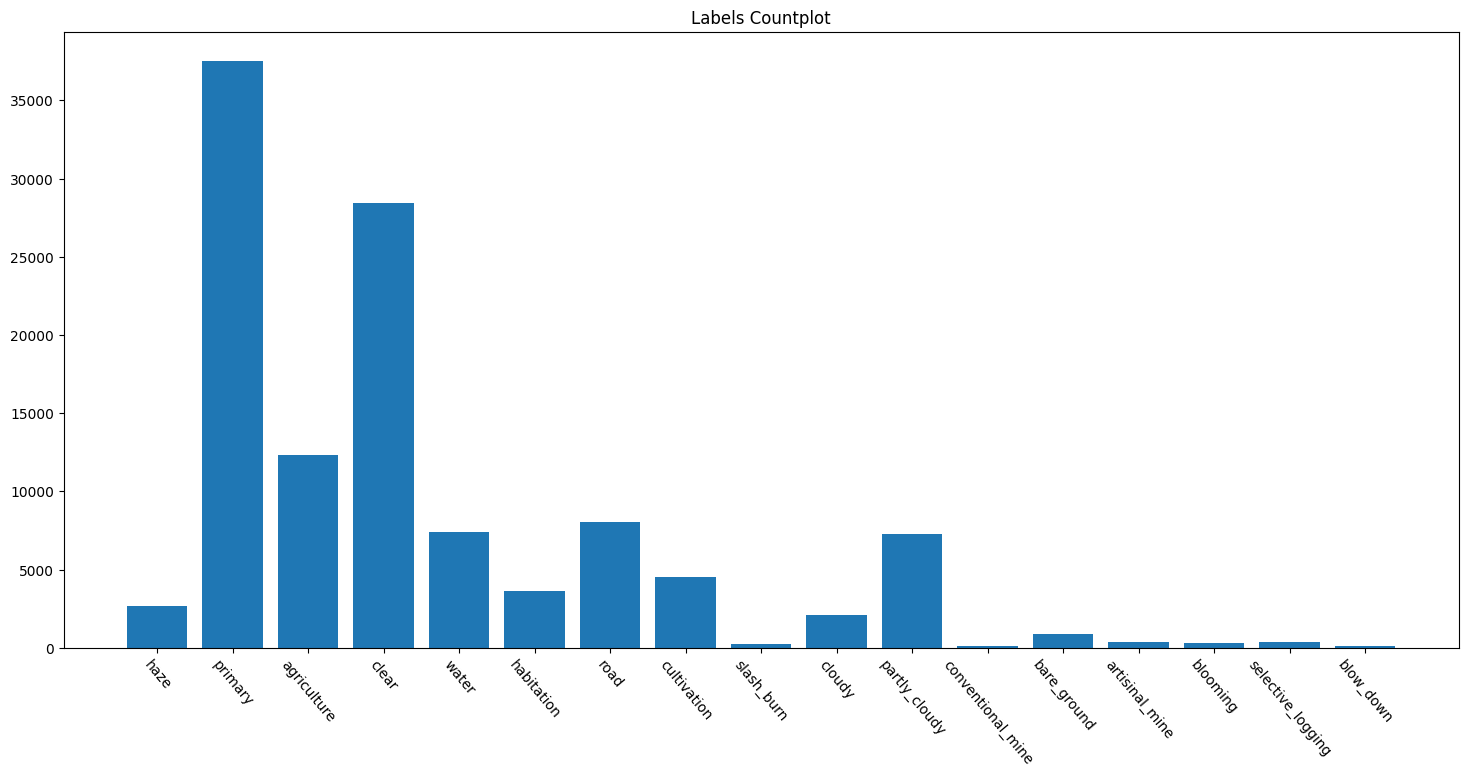

In [5]:
cnt_label = {}
for label_names in df['tags_split'].values:
  for l in label_names:
    cnt_label[l] = cnt_label[l] + 1 if l in cnt_label else 0

plt.figure(figsize=(18,8))
idxs = range(len(cnt_label.values()))
plt.bar(idxs, cnt_label.values())
plt.xticks(idxs, cnt_label.keys(), rotation=-50)
plt.title('Labels Countplot')
plt.show()

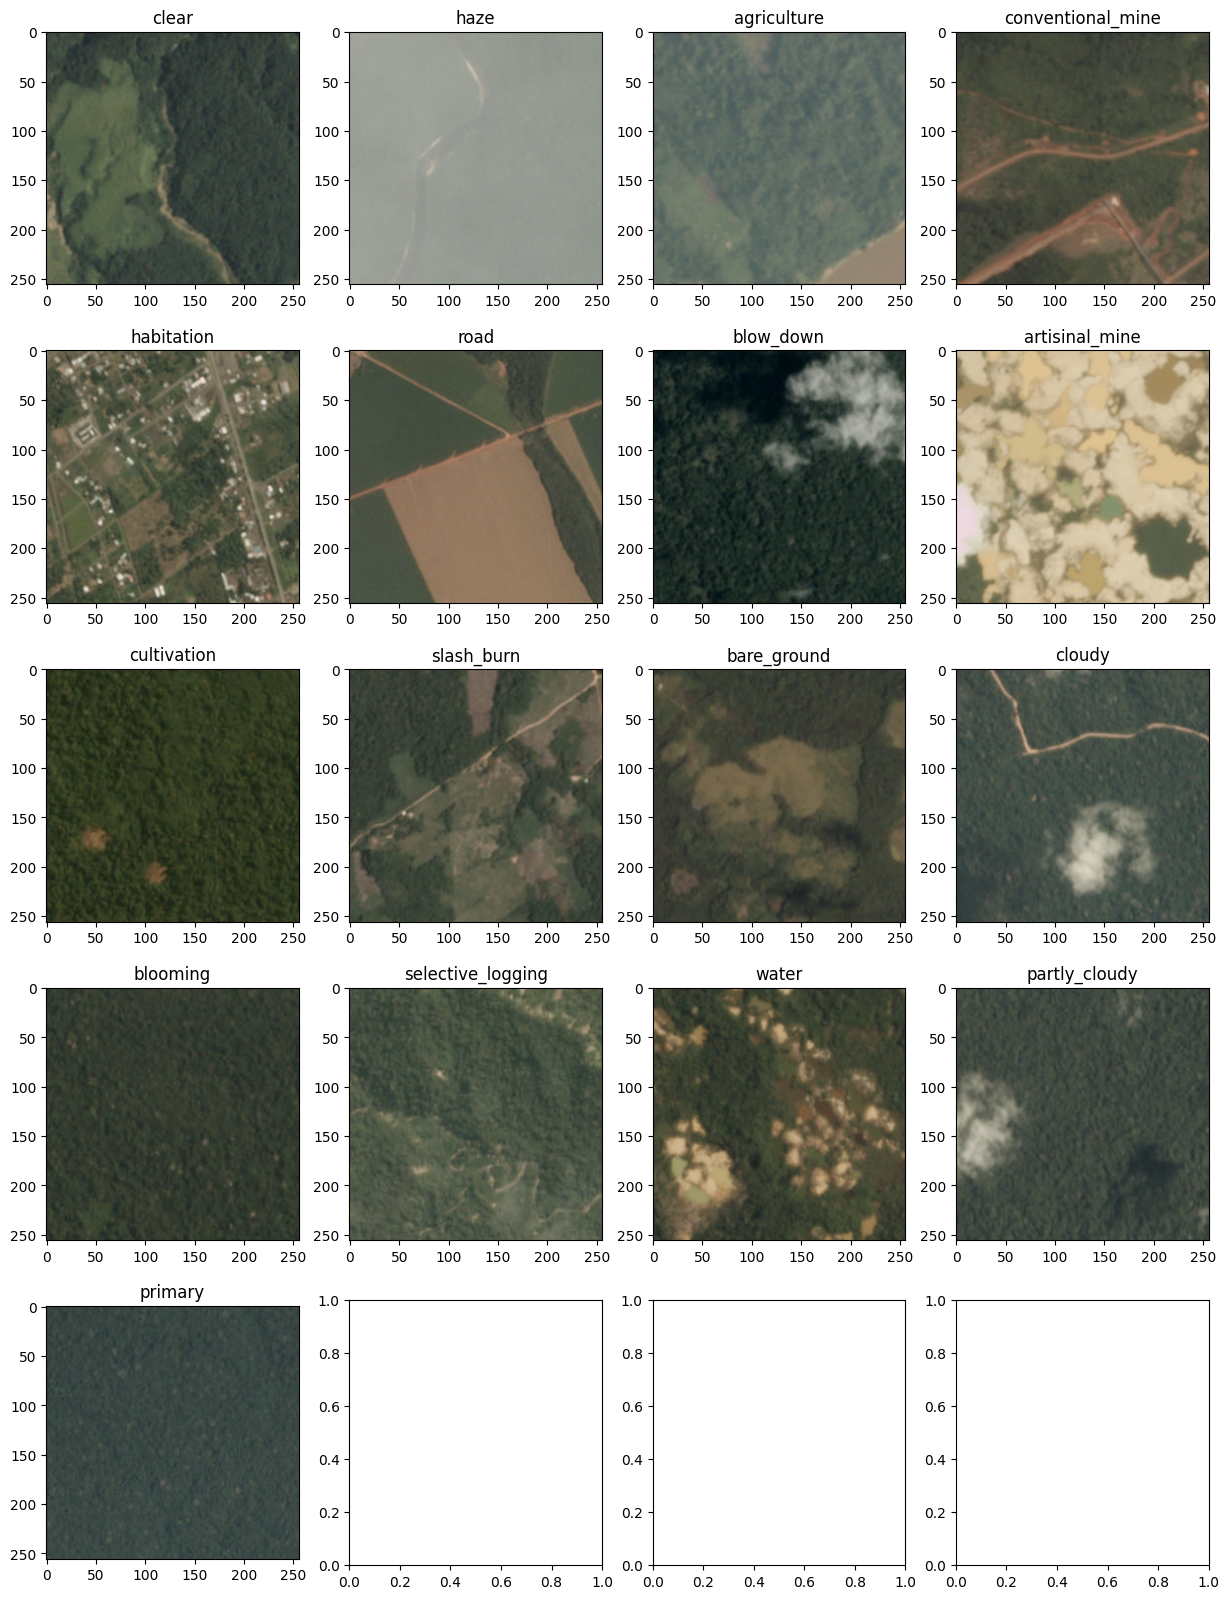

In [6]:
images_title = [df[df['tags'].str.contains(label)].iloc[i]['image_name'] for i, label in enumerate(labels)]

_, ax = plt.subplots(5,4, figsize=(15,20))
ax = ax.ravel()

for i, (image_name, label) in enumerate(zip(images_title, labels)):
  img = mpimg.imread(image_name)
  ax[i].imshow(img)
  ax[i].set_title('{}'.format(label))

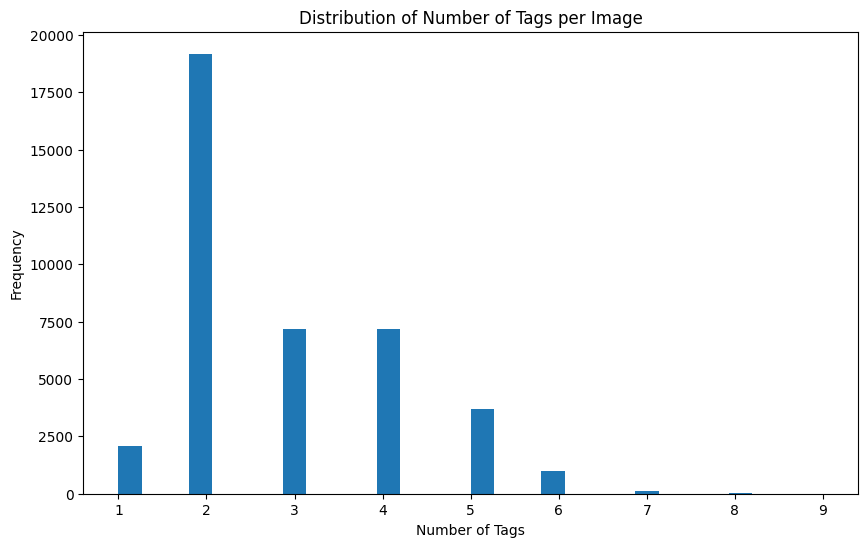

In [7]:
df['tag_count'] = df['tags_split'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(df['tag_count'], bins=30)
plt.title('Distribution of Number of Tags per Image')
plt.xlabel('Number of Tags')
plt.ylabel('Frequency')
plt.show()